Nama : Ammar Umran Fauzi Ramadhan <br>
NIM : 211351016 <br>
Kelas : Pagi B

# import library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Data Discovery

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# EDA (minimal 5)

In [6]:
#1. Menampilkan berapa banyak Tipe dari kaca
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [7]:
#2. Mengurutkan tipe kaca berdasarkan RI
df_sorted = df.sort_values(by=['Type', 'RI'], ascending=[True, False])
df_sorted.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.0,0.10,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1
69,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
63,1.52227,14.17,3.81,0.78,71.35,0.00,9.69,0.0,0.00,1
48,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.0,0.00,1


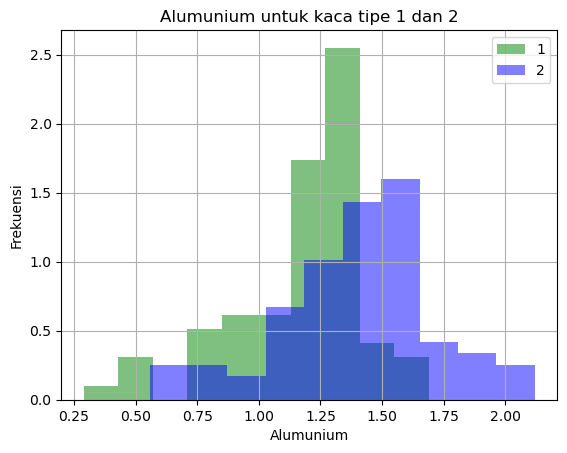

In [8]:
#3. Mengetahui apakah rata rata Alumunium (Al) tipe 1 lebih banyak dari rata rata Aluminum (Al) tipe 2
df[df["Type"] == 1]["Al"].hist(
    color="green", label="1", alpha=0.5, density=True
)
df[df["Type"] == 2]["Al"].hist(
    color="blue", label="2", alpha=0.5, density=True
)
plt.title("Alumunium untuk kaca tipe 1 dan 2")
plt.xlabel("Alumunium")
plt.ylabel("Frekuensi")
plt.legend();

In [9]:
#4. Menampilkan banyak fitur Iron (Fe) pada setiap Type
pd.crosstab(df["Fe"], df["Type"], margins=True)

Type,1,2,3,5,6,7,All
Fe,,,,,,,
0.0,45,44,12,11,9,23,144
0.01,0,0,0,0,0,1,1
0.03,1,0,0,0,0,0,1
0.05,0,0,0,0,0,1,1
0.06,1,0,0,0,0,0,1
0.07,2,0,0,0,0,1,3
0.08,0,1,0,0,0,1,2
0.09,1,2,1,0,0,2,6
0.1,1,3,1,0,0,0,5


In [10]:
#5. Median dan Standar deviasi dari sodium (Na) dan dibulatkan menjadi dua desimal
print("Median Na: ", round(df["Na"].median(), 2))
print("Na std: ", round(df["Na"].std(), 2))

Median Na:  13.3
Na std:  0.82


# Preprocessing

In [12]:
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state=90)
y_test.shape

(54,)

# modeling

In [13]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train, y_train)
y_pred1=model1.predict(X_test)

In [14]:
score = model1.score(X_test, y_test)
print('akurasi model KNN = ', score)

akurasi model KNN =  0.6111111111111112


In [19]:
#RI = 1,51743 Na = 13,5 Mg = 3,4 Al = 1,2 Si = 71,32 K = 0,2 Ca = 5,43 Ba = 0 Fe = 0
input_data = np.array([[1.51743, 13.5, 3.4, 1.2, 71.32, 0.2, 5.43, 0, 0]])

prediction = model1.predict(input_data)
print('Estimasi Type Kaca : ', prediction)

Estimasi Type Kaca :  [2]


d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Visualisasi hasil algoritma

<Axes: xlabel='RI', ylabel='Na'>

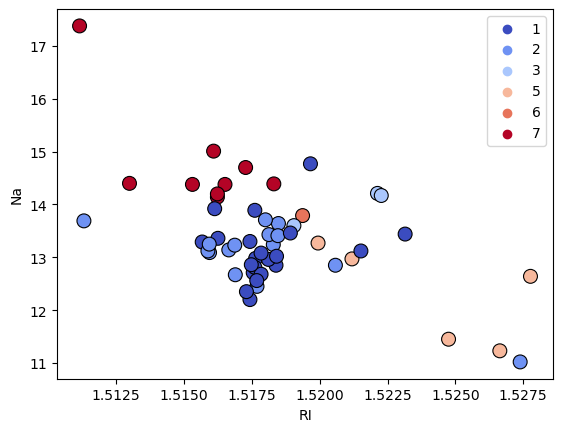

In [16]:
#Scatter plot untuk data uji
sns.scatterplot(x=X_test['RI'], y=X_test['Na'], hue=y_pred1, palette='coolwarm', marker='o', s=100, edgecolor='k')

# save model (pickle)

In [17]:
import pickle

filename = 'UAS_ML1_211351016_Ammar.sav'
pickle.dump(model1,open(filename,'wb'))